### usage of  poisson.pmf and random.gamma and random.poisson

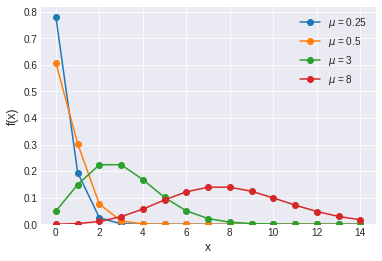

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
x = np.arange(0, 15)
for m in [0.25,0.5, 3, 8]:
  pmf = st.poisson.pmf(x, m)
  plt.plot(x, pmf, '-o', label='$\mu$ = {}'.format(m))
  # print(pmf)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0)
plt.legend(loc=1)
plt.show()

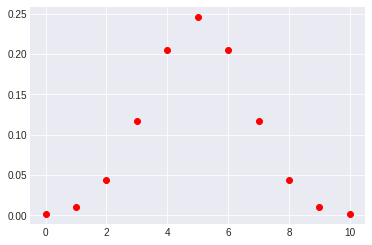

In [66]:
from scipy.special import comb
import matplotlib.pyplot as plt

pbinom = lambda y, n, p: comb(n, y) * p**y * (1-p)**(n-y)

yvals = range(10+1)
plt.plot(yvals, [pbinom(y, 10, 0.5) for y in yvals], 'ro');


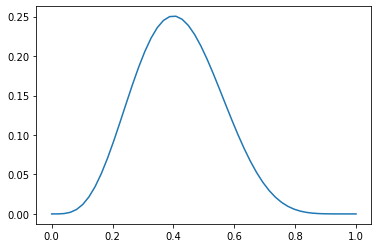

In [0]:
import numpy as np

pvals = np.linspace(0, 1)
y = 4
plt.plot(pvals, [pbinom(y, 10, p) for p in pvals]);

In [67]:
# Simulate gamma means
import numpy as np
r = 3
p = 0.7

lam = np.random.gamma(r, p/(1.-p), size=100000)
sim_vals = np.random.poisson(lam)
sim_vals.sum() / 100000.

6.99145

### generating random variables and the functions supported by continuous distributions 

In [10]:
import numpy as np
np.random.normal(loc=2,scale=0)
np.random.binomial(100,0.5)
np.random.poisson(4)
np.random.beta(1,2)
np.random.gamma(1,2)

0.7794544857080347


- beta

>$$ f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
                                                 (1 - x)^{\beta - 1}$$





- where 

>$$B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}
                             (1 - t)^{\beta - 1} dt.$$


- gamma

>$$p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}$$


- where 

> $$\Gamma(x) = \int_0^{-\infty} t^{x - 1} e^{-t} dt$$

- normal 

>$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
                 e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$



- where 

$$\sqrt{ \pi} = 2 * \frac{1}{2}!$$

- binomial 

>$$ P(N) = \binom{n}{N}p^N(1-p)^{n-N}$$

- chisquare 

>$$p(x) = \frac{(1/2)^{k/2}}{\Gamma(k/2)}
                 x^{k/2 - 1} e^{-x/2}$$


- exponential 

>$$ f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$$

-  poisson

> $$f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$$
                                                

In [0]:
from scipy import stats
import inspect 
print(inspect.getdoc(stats.rv_continuous)) 


Methods
(for any continuous random variable)
- rvs
- pdf
- logpdf
- cdf
- logcdf
- sf
- logsf
- ppf
- isf
- moment
- stats
- entropy
- expect
- median
- mean
- std
- var
- interval
- __call__
- fit
- fit_loc_scale
- nnlf
- support

In [0]:
## all distributions 
dir(stats.distributions)

### testing whether a variable belong to particular distribution 

In [24]:
import inspect 
print(inspect.getdoc(stats.anderson))

import inspect 
print(inspect.getdoc(stats.kstest))


Anderson-Darling test for data coming from a particular distribution.

The Anderson-Darling tests the null hypothesis that a sample is
drawn from a population that follows a particular distribution.
For the Anderson-Darling test, the critical values depend on
which distribution is being tested against.  This function works
for normal, exponential, logistic, or Gumbel (Extreme Value
Type I) distributions.

Parameters
----------
x : array_like
    Array of sample data.
dist : {'norm','expon','logistic','gumbel','gumbel_l', gumbel_r',
    'extreme1'}, optional
    the type of distribution to test against.  The default is 'norm'
    and 'extreme1', 'gumbel_l' and 'gumbel' are synonyms.

Returns
-------
statistic : float
    The Anderson-Darling test statistic.
critical_values : list
    The critical values for this distribution.
significance_level : list
    The significance levels for the corresponding critical values
    in percents.  The function returns critical values for a
    differ

### gassian kernel density estimation 

In [0]:
import inspect 
print(inspect.getdoc(stats.gaussian_kde))



In [0]:
# Generate some random two-dimensional data:

from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

# Perform a kernel density estimate on the data:

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]     # like linespace but multidimentional 
positions = np.vstack([X.ravel(), Y.ravel()])         # ravel = flatten out
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Plot the results:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
plt.show()

### statistical significance 

In [0]:
# non parametric
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway    # anova
from scipy.stats import ttest_rel   # paired
from scipy.stats import ttest_ind

# corelation 
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

